In [1]:
import numpy as np
import mahotas
from mahotas import features
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix
from PIL import Image, ImageDraw
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import os
import random
from skimage import io

In [2]:
#Color map skewed toward brightness for easier visualization of GLCMs with low values-
image = Image.open(r"C:\Users\justinamb\Desktop\TextureCode\Images\greymap3.png")
cmapdata = np.asarray(image)
cmapdata=np.fliplr(cmapdata)
print(cmapdata.shape)
newmap=cmapdata[15,:,:]/256
mymap2 = mcolors.ListedColormap(newmap)

(17, 628, 4)


In [42]:
#Function which plots image and GLCM, extracts and returns features and GLCM-
def showtexture(tester_array, nolevels=256, igzeros=False, show=True, normalized=False):
    if normalized==True:
    #To work with normalized array-
        normalizedarray = tester_array.astype(np.float64)/np.nanmax(tester_array)
        normalizedarray = normalizedarray*(nolevels-1)
        normalizedarray = normalizedarray.astype(np.uint8)
    
    if normalized == False:
    #Non-normalized array-
        normalizedarray = tester_array.astype(np.uint8)
    
    glcm = graycomatrix(
        normalizedarray, distances=[1], angles=[0], levels=nolevels, symmetric=False, normed=True
        )


    features=mahotas.features.haralick(normalizedarray, preserve_haralick_bug=False, use_x_minus_y_variance=True, compute_14th_feature=True)

    if igzeros:
        glcm[0,0]=0
    
    if show:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = "Times New Roman"
        f=ax1.imshow(normalizedarray, vmin=0, vmax=nolevels, cmap='gray')
        ax1.set_yticklabels([])
        ax1.set_xticklabels([])
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax1.set_title("Input Image")
        plt.colorbar(f, ax=ax1, shrink=0.3)
        paddedglcm=np.zeros((nolevels+8,nolevels+8))
        paddedglcm[4:nolevels+4,4:nolevels+4]=glcm[:,:,0,0]
        g=ax2.imshow(paddedglcm, cmap=mymap2) 
        ax2.set_title("GLCM")
        plt.colorbar(g, ax=ax2, shrink=0.3)
        plt.tight_layout()
        plt.show()
        

    return(features,glcm)


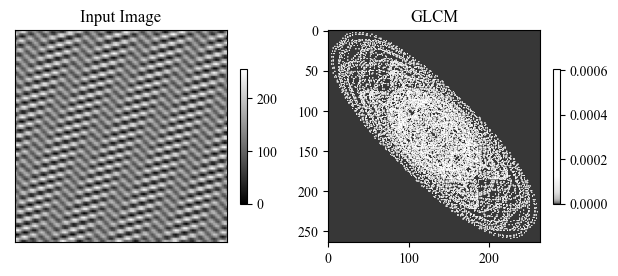

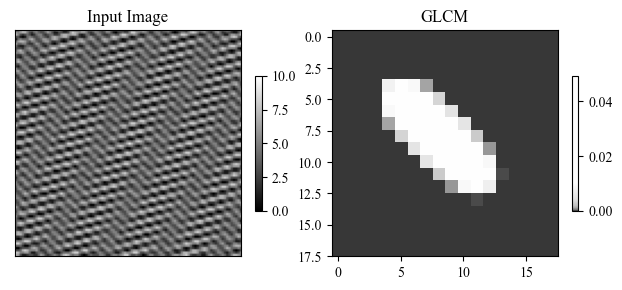

In [44]:
imagepath=r"C:\Users\justinamb\Desktop\TextureCode\Images\Textim24.png"
testpic = np.array(io.imread(imagepath))
picfeatures, picglcm=showtexture(testpic)

#To change the number of grey levels you will either need to make sure the image is already set to that number of grey levels
#Or you can set normalized to True to automaticaly rescale the image to span those Grey Levels-

picfeatures, picglcm=showtexture(testpic, 10, normalized=True)

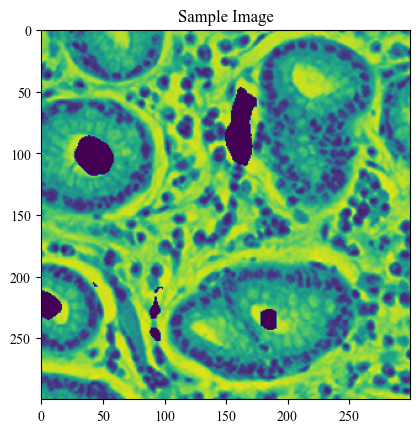

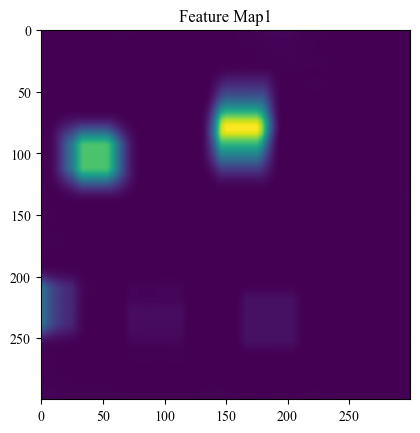

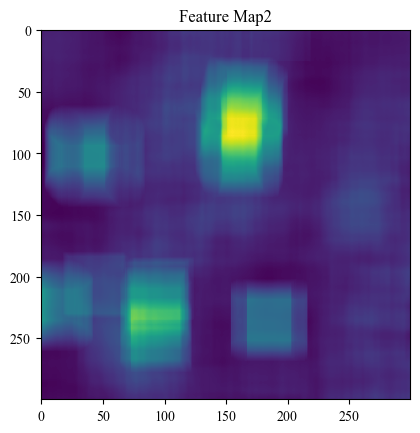

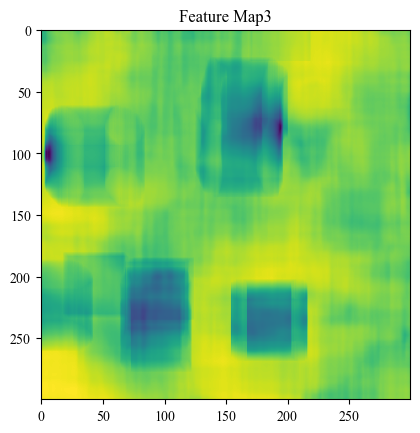

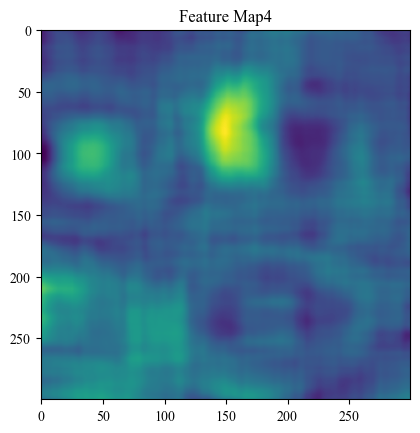

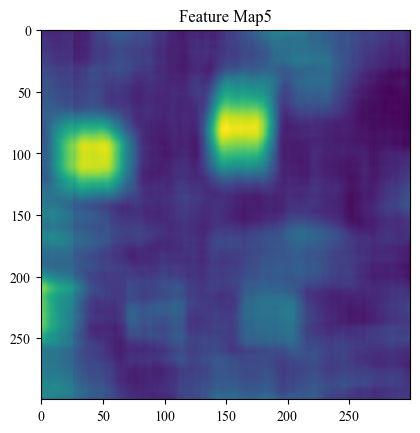

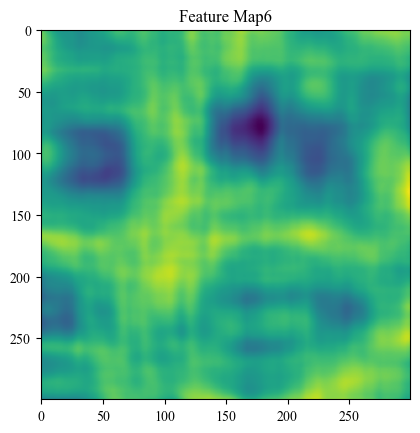

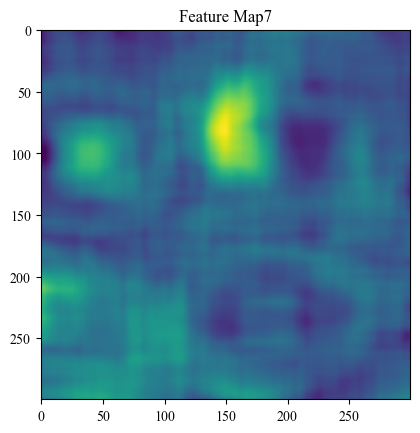

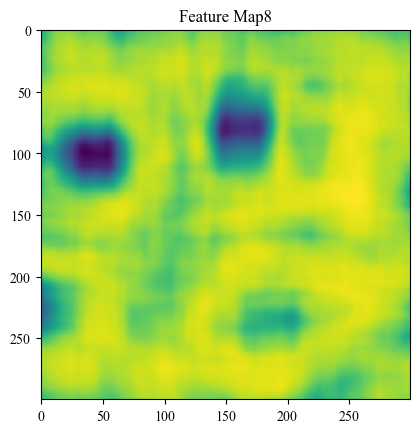

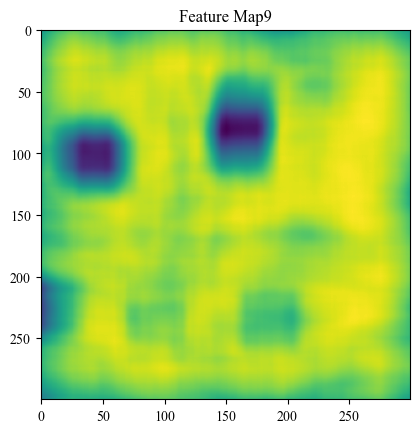

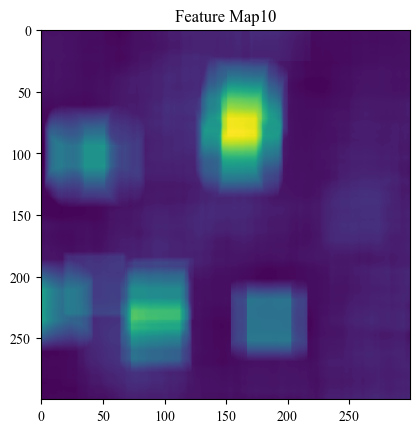

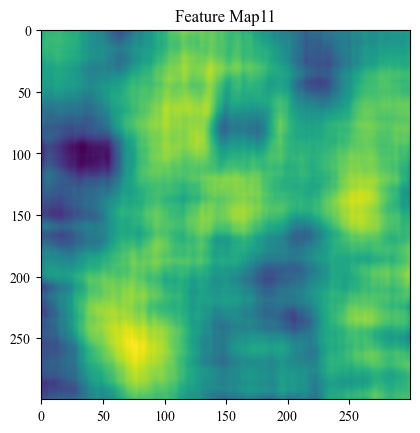

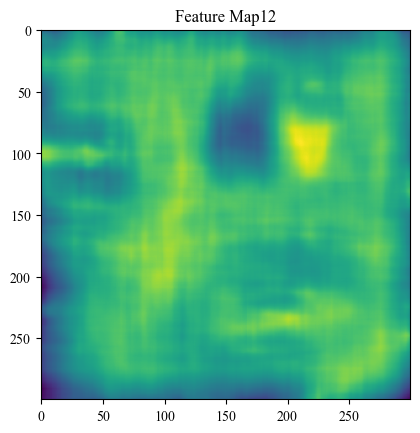

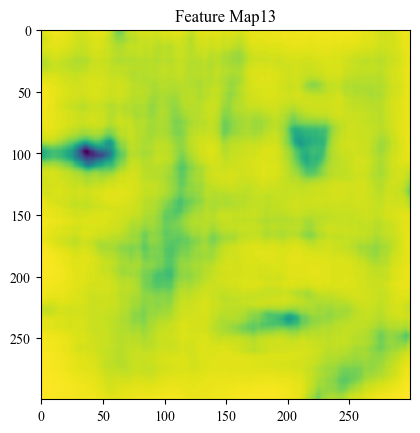

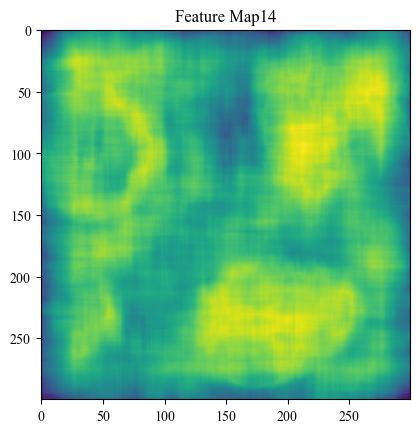

In [16]:
# Function to scan over image pixel by pixel and take features of squares of a set size, see kernsize-
#Takes a long time and the results are not always the most inspiring

imagepath=r"C:\Users\justinamb\Desktop\TextureCode\Images\Slidesampim.png"
testpic = np.array(io.imread(imagepath))[:300,:300]

plt.title("Sample Image")
plt.imshow(testpic)
plt.show()

testimage=testpic.astype(np.uint8)

emptyarray=np.zeros((testimage.shape[0],testimage.shape[1],14))

#Size of pixel squares-
kernsize=50

for i in range(testimage.shape[0]):
    for j in range(testimage.shape[1]):
        step=np.floor(kernsize/2)
        #accounting for edgecases-
        if i<step+1:
            stepd=int(i)
            stepu=int(step)
        
        if j<step+1:
            stepl=int(j)
            stepr=int(step)
        
        if i>testimage.shape[0]-step-1:
            stepd=int(step)
            stepu=int(testimage.shape[0]-i)
            
        if j>testimage.shape[1]-step-1:
            stepl=int(step)
            stepr=int(testimage.shape[1]-j)
    
        chunk=testimage[i-stepd:i+stepu,j-stepl:j+stepr]
        picfeatures=mahotas.features.haralick(chunk, preserve_haralick_bug=False, use_x_minus_y_variance=True, compute_14th_feature=True)[0,:]
        emptyarray[i,j,:]=picfeatures

for i in range(14):        
    plt.title("Feature Map"+ str(i+1))       
    plt.imshow(emptyarray[:,:,i])
    plt.show()

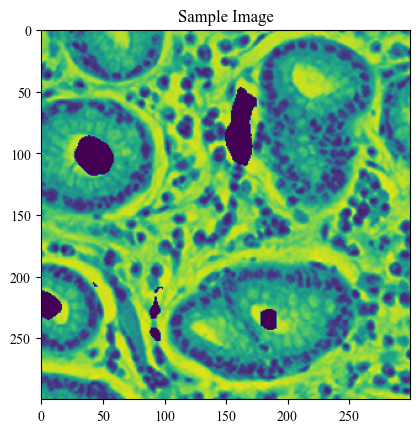

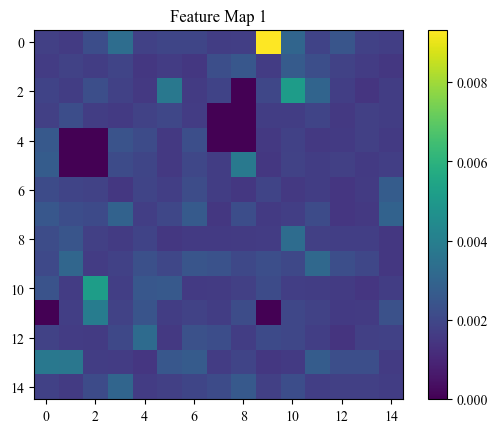

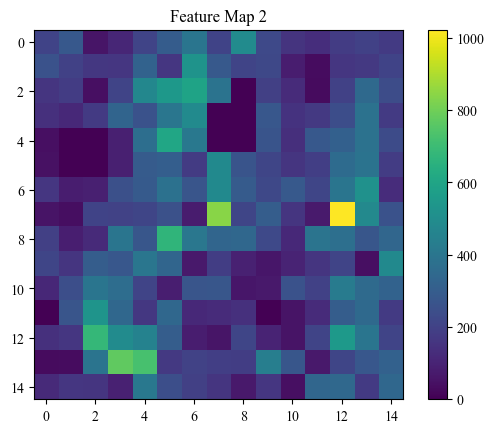

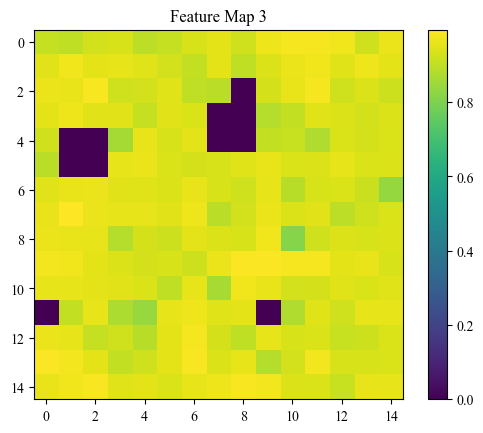

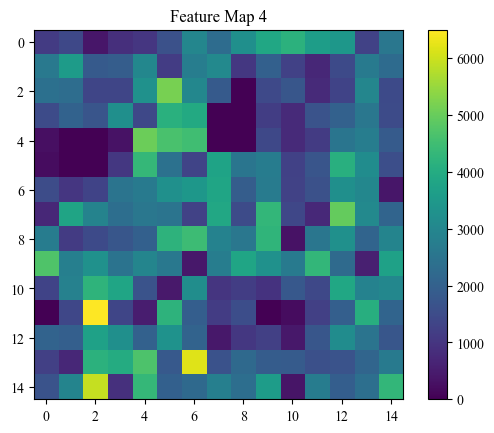

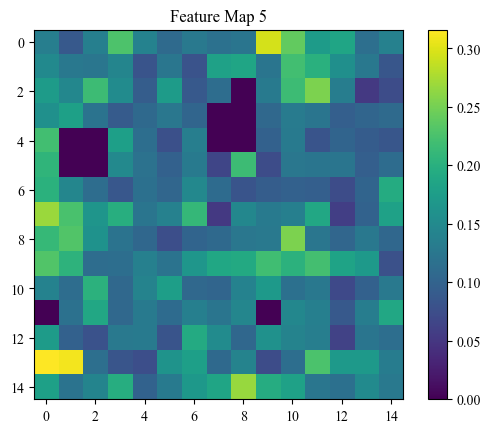

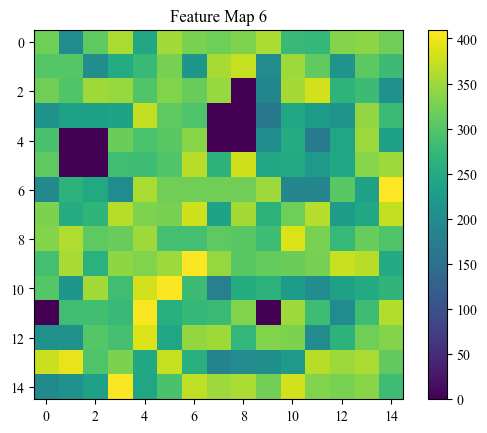

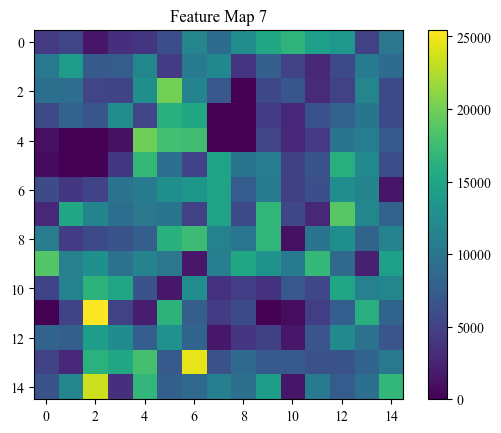

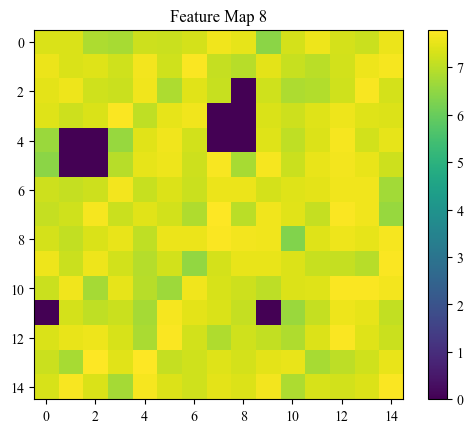

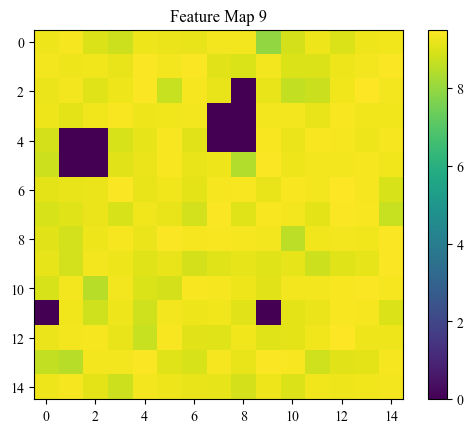

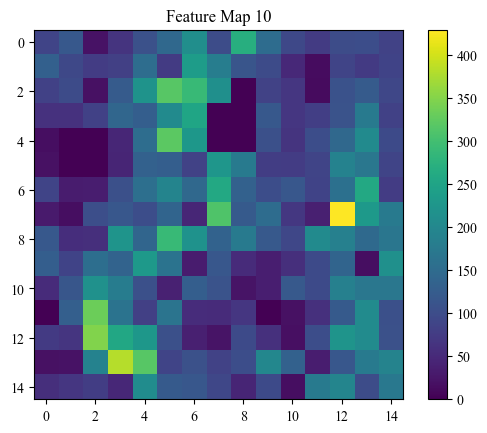

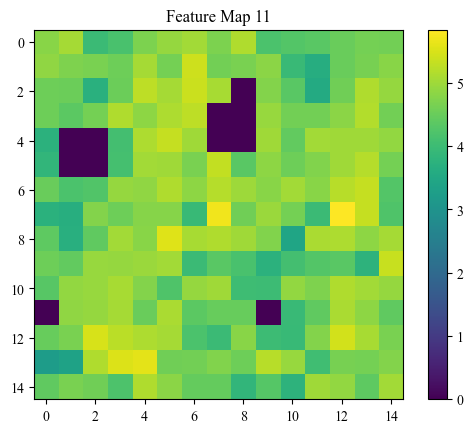

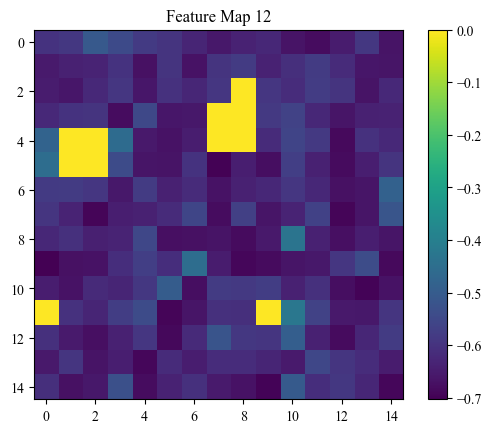

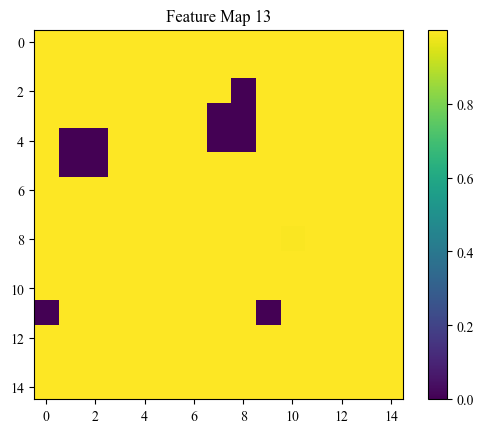

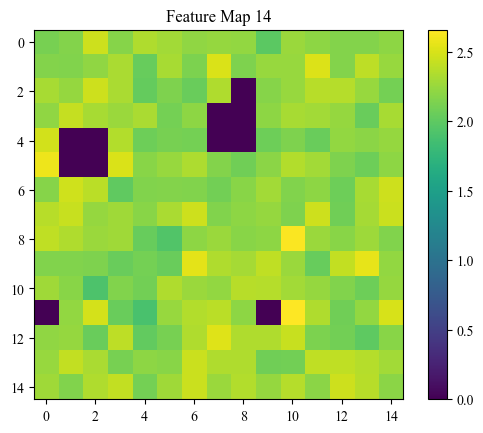

In [18]:
#A perhaps better version which takes the texture features over chinks of the image to create pixelated feature maps- 

imagepath=r"C:\Users\justinamb\Desktop\TextureCode\Images\Slidesampim.png"
testpic = np.array(io.imread(imagepath))[:300,:300]

plt.title("Sample Image")
plt.imshow(testpic)
plt.show()

yshape=testpic.shape[0]
xshape=testpic.shape[1]
pixelsize=20
ysteps=int(np.floor(yshape/pixelsize))
xsteps=int(np.floor(xshape/pixelsize))
featarray=np.zeros((ysteps,xsteps,14))
for i in range(xsteps):
    for j in range(ysteps):
        chunk=testpic[pixelsize*j:pixelsize*(j+1),pixelsize*i:pixelsize*(i+1)]
        if np.count_nonzero(chunk==0)<100:
            features=mahotas.features.haralick(chunk, preserve_haralick_bug=False, use_x_minus_y_variance=True, compute_14th_feature=True, ignore_zeros=True)[0,:]
            featarray[j,i,:]=features
        
for i in range(14):        
    plt.title("Feature Map "+str(i+1))        
    f=plt.imshow(featarray[:,:,i])
    plt.colorbar(f)
    plt.show()

In [24]:
#For working with a set of images-
#Load imageset back in and take texture features-
dir_path = r"C:\Users\justinamb\Desktop\SimTexts"

# Change the directory 
os.chdir(dir_path) 

imageset=[]
# iterate through all file 
for file in os.listdir(): 
    # Check whether file is in text format or not 
    pic = np.array(io.imread(file))
    imageset.append(pic)
print("Number of images-", len(imageset))

#Take Texture feats-
featlist=[]
for i in imageset:
    #If you want to normalize the array-
#     normalizedarray = i.astype(np.float64)/np.nanmax(i)
#     normalizedarray = normalizedarray*255
#     normalizedarray = normalizedarray.astype(np.uint8)

    imup=i.astype(np.uint8)
    features=mahotas.features.haralick(imup, preserve_haralick_bug=False, compute_14th_feature=True, use_x_minus_y_variance=True)
    #If you want to take the mean over the 4 directions- 
    #avefeats=np.mean(features, axis=0)
    #Otherwise all features are added to a list to be further processed-
    featlist.append(features)

    
#Reorganize into an array for easier workability-
Featarrayfull=np.array(featlist)
#Seperating out the horizontal samples-
FeatarrayH=np.array(featlist)[:,0,:]
print("Feature array shape-", FeatarrayH.shape)

Number of images- 82
Feature array shape- (82, 14)


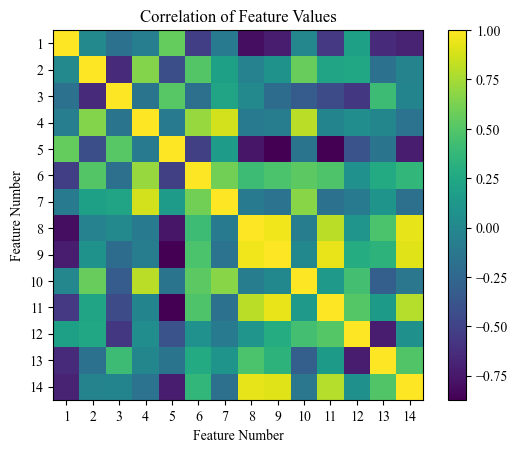

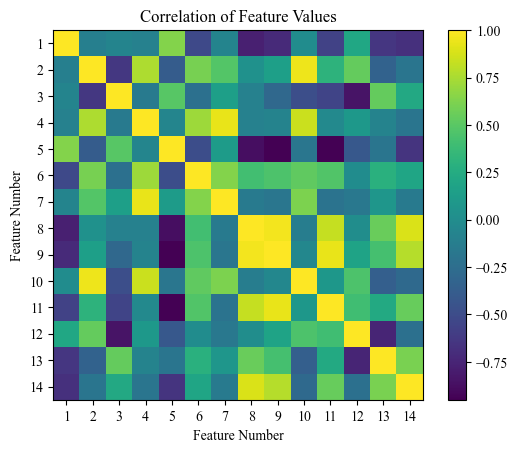

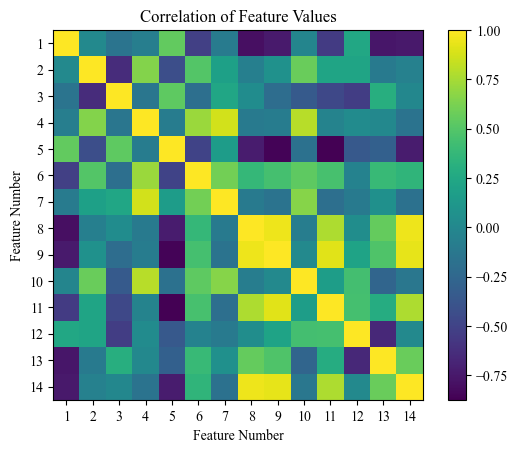

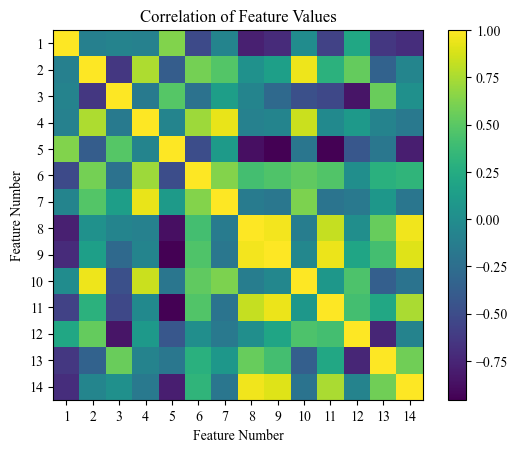

()

In [61]:
#Correlation of differet features across four different directions-

def corbydirection(FullFeatArray):
    titlelist=["Horizontal", "Vertical", "45", "135"]
    for i in range(4):
        cor=np.corrcoef(FullFeatArray[:,i,:].astype('float64').T)
        plt.title("Feature Correlation " + titlelist[i])
        f=plt.imshow(cor)
        plt.colorbar(f)
        plt.title("Correlation of Feature Values")
        plt.xlabel("Feature Number")
        plt.ylabel("Feature Number")
        plt.xticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12,13], ['1', '2', '3','4', '5', '6','7', '8', '9','10', '11', '12','13', '14'])
        plt.yticks([0,1, 2, 3,4,5,6,7,8,9,10,11,12,13], ['1', '2', '3','4', '5', '6','7', '8', '9','10', '11', '12','13', '14'])
        plt.show()
    return()

corbydirection(Featarrayfull)
    

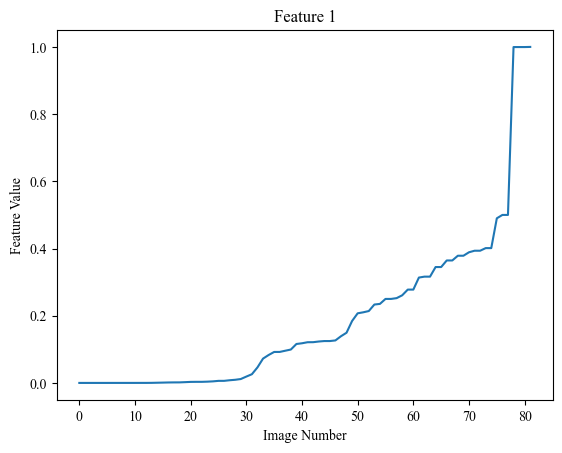

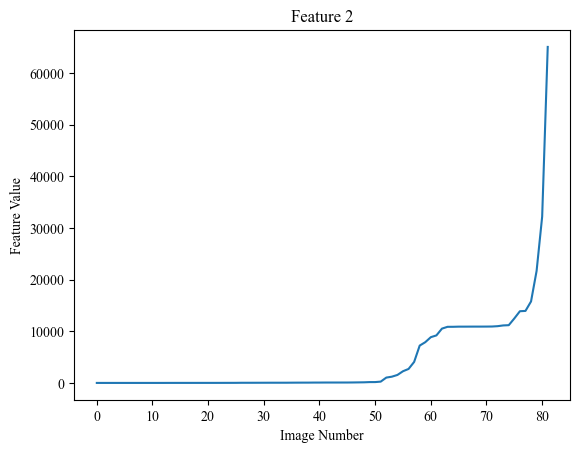

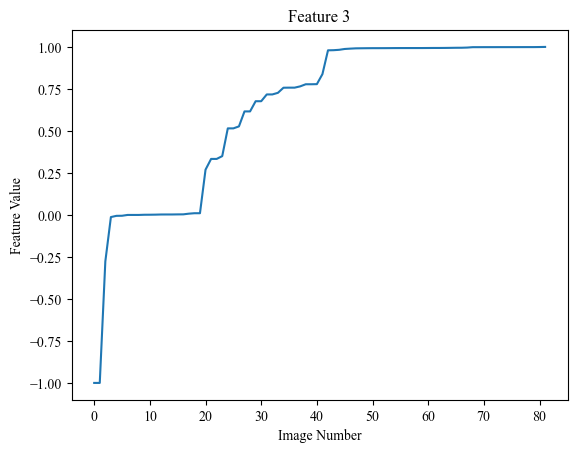

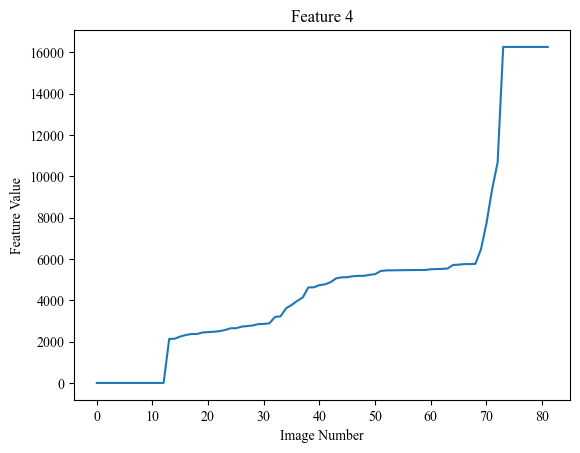

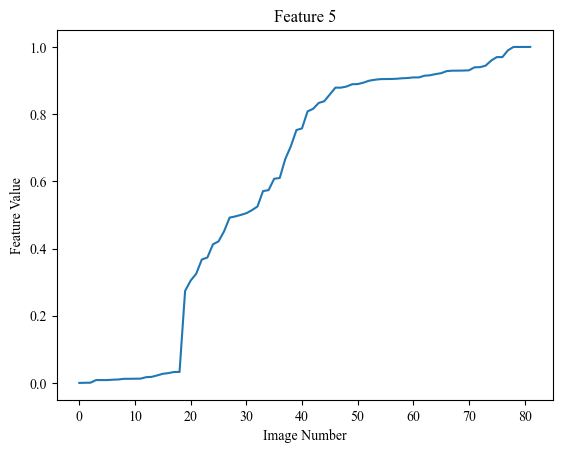

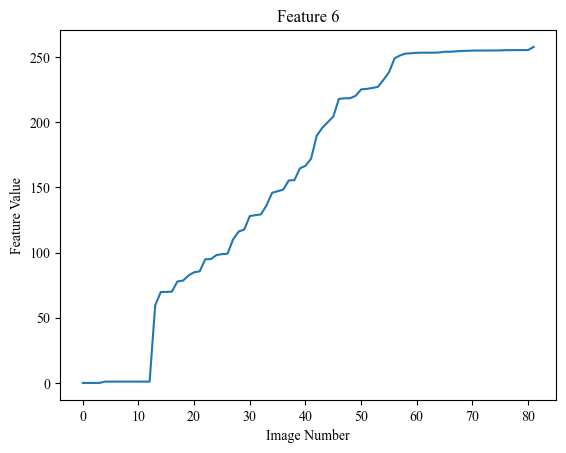

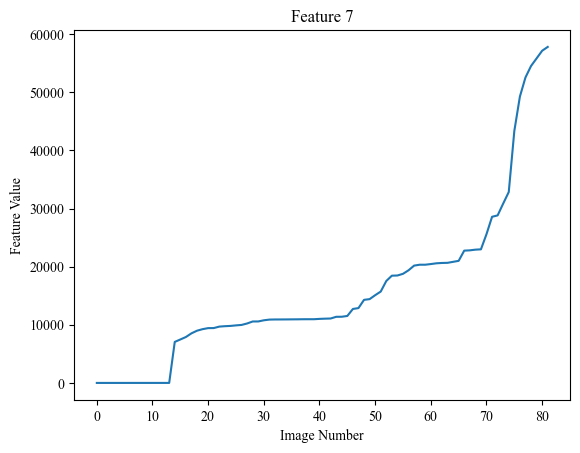

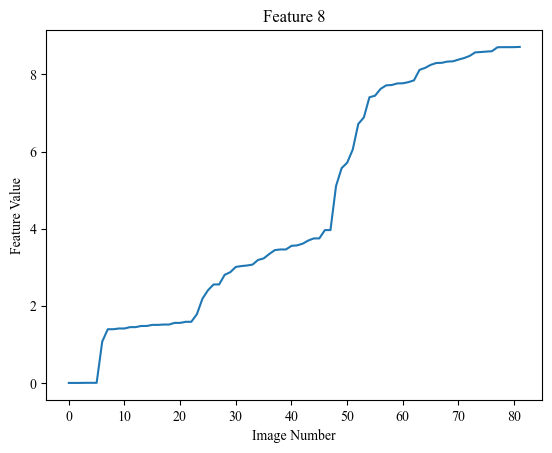

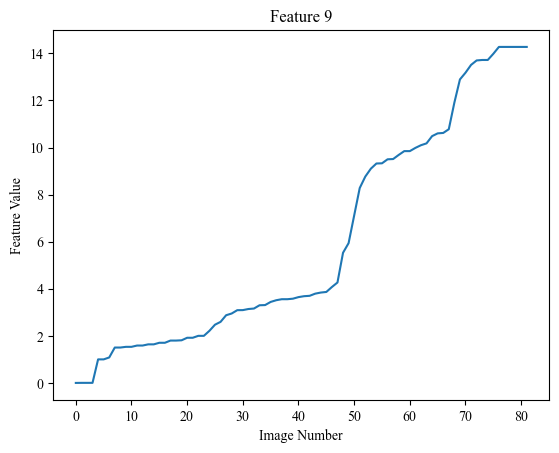

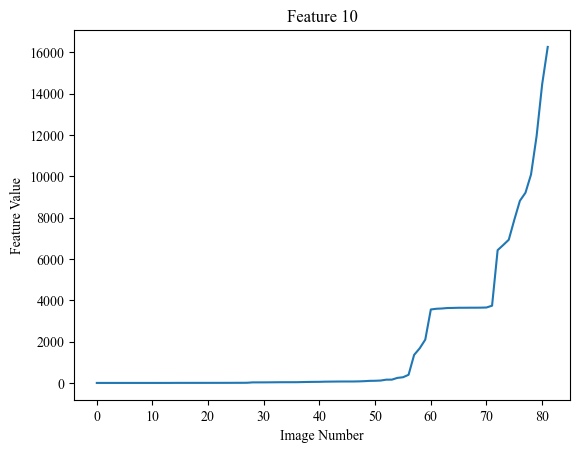

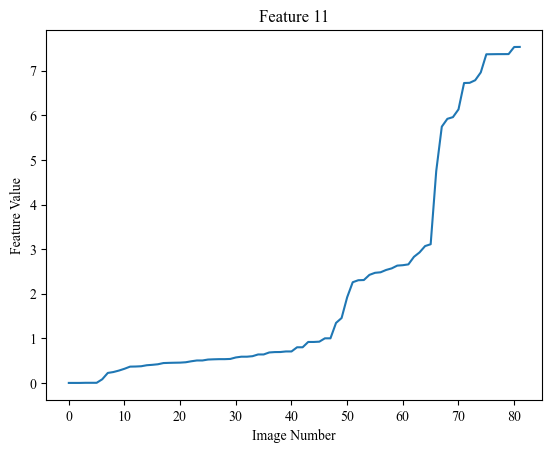

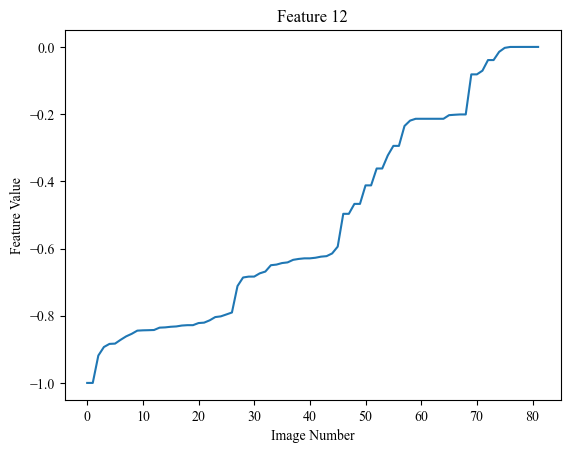

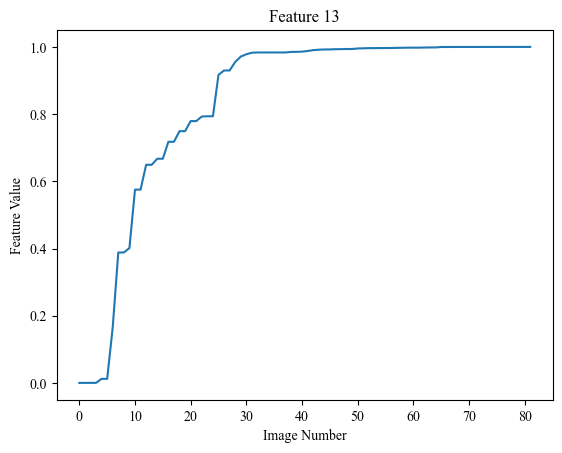

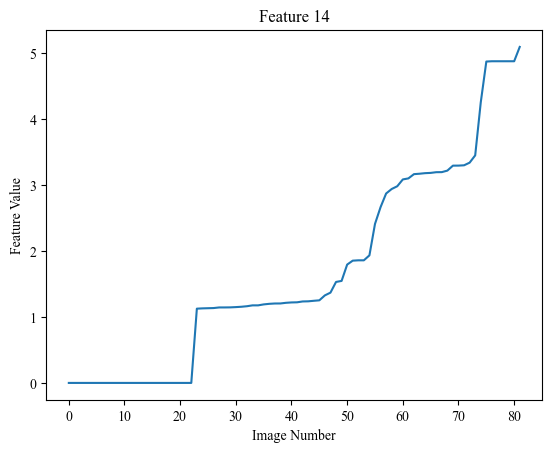

In [57]:
#Ordering the images based on feature value-
def sortSecond(val):
    return val[1] 


def orderims(Featarray):
    indecies=np.arange(len(Featarray)).reshape(len(Featarray),1)
    orderedfeats=[]
    for i in range(14):
        feats=Featarray[:,i].reshape(len(Featarray),1)
        featsandindicies=np.concatenate((indecies,feats),axis=1)
        orderedvals=list(featsandindicies)
        orderedvals.sort(key=sortSecond)
        orderedfeat=np.array(orderedvals)
        orderedfeats.append(orderedfeat)
        plt.plot(orderedfeat[:,1])
        plt.title("Feature " +str(i+1))
        plt.xlabel("Image Number")
        plt.ylabel("Feature Value")
        plt.show()
    return(orderedfeats)
    

orderedfeats=orderims(FeatarrayH)
    

In [58]:
#Select a feature to look at the images for by adjusting the feature number below-
featurenumber=9
oset=orderedfeats[featurenumber-1]
#Show images in order with GLCM's, (Slow for large image sets)-
# for j in range(oset.shape[0]):
#     index=int(oset[j,0])
#     showtexture(imageset[index])

Number of iamges in linear sampling-  22


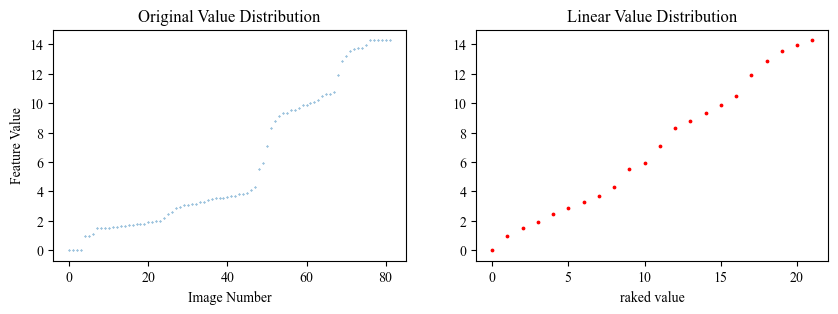

C:\Users\justinamb\AppData\Local\Temp\ipykernel_19400\3531848857.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Min. Feat Image","Max. Feat. Image"])


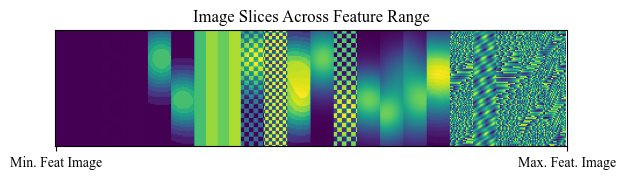

<Figure size 40000x8000 with 0 Axes>

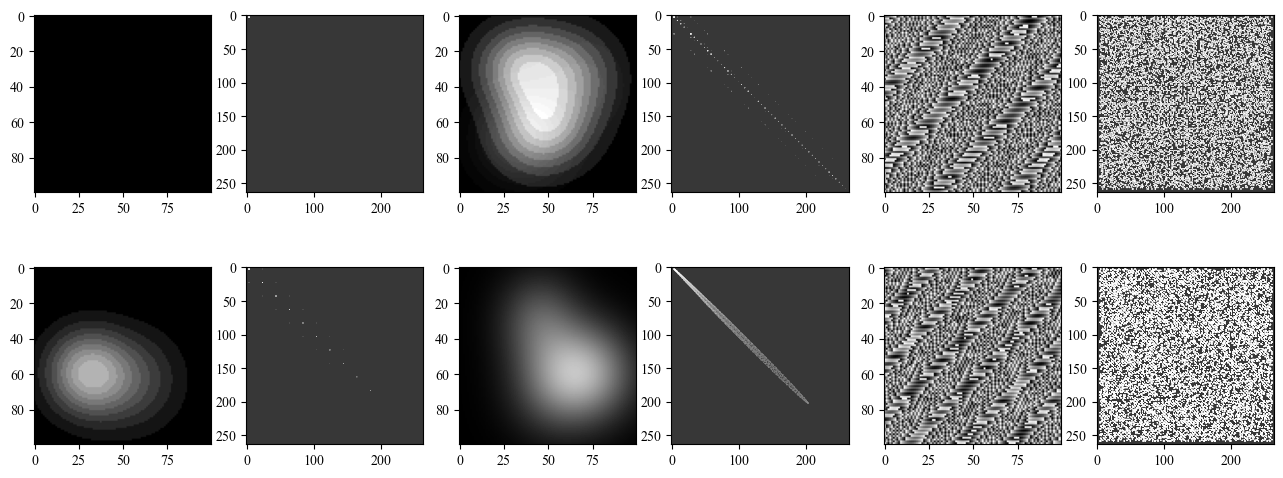

<Figure size 40000x8000 with 0 Axes>

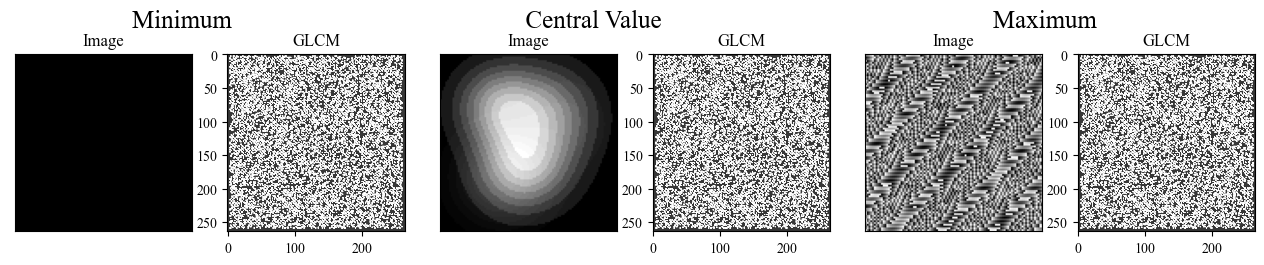

In [80]:
#A function which takes as linear of a sampling of the images across the feature range as possible and plots them in various ways-
def linearsampling(dataset, ln, mode="sim", indlist=[], imsize=100):
    vals=dataset[:,1]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    xval0=np.arange(len(vals))
    ax1.scatter(xval0,vals,s=0.1)
    ax1.set_title("Original Value Distribution")
    ax1.set_xlabel("Image Number")
    ax1.set_ylabel("Feature Value")
    #To adjust linear stringency of slope ln value is added below-
    linearslope=(np.max(vals)-np.min(vals))/(len(vals)*ln)
    index=0
    val1=vals[0]
    linearlist=[dataset[0]]
    pointlist=[]
    while index<(len(vals)-1):
    #testing for linearity-
        index=index+1
        nextval=linearslope+val1
        val2=vals[index]
        while nextval>val2:
            index=index+1
            #Handling for the end value-
            if index<(len(vals)-1):
                val2=vals[index]
            else:
                index=(len(vals)-1)
                break
        linearlist.append(dataset[index])
        pointlist.append([index,dataset[index][1]])
        val1=val2
    lineararray=np.array(linearlist)
    pointarray=np.array(pointlist)
    print("Number of iamges in linear sampling- ", len(lineararray))
    xval=np.arange(len(lineararray))
    ax2.scatter(xval,lineararray[:,1], c="red", s=3)
    ax2.set_title("Linear Value Distribution")
    ax2.set_xlabel("raked value")
    plt.show()
    
    #A slice of each image in the linear sampling is taken and added to an array- 
    showlist=[]
    subshowlist=[]
    rangearray=np.zeros((imsize,len(linearlist)*20))
    #Simultaneously images are added to a list to show a sampling of images and GLCM's across the range-
    
    jumpsize=int(np.ceil(lineararray.shape[0]/5))
    #Adding a little handling for edge cases-
    if (lineararray.shape[0]-1)%jumpsize==0:
        jumpsize=int(np.ceil(lineararray.shape[0]/6))
    jump=0
    
    
    #Selecting out min max and central values to be plotted as well-
    linlength= len(lineararray)-1
    halflinlength=int(linlength/2)
    
    for j in range(lineararray.shape[0]):
        index=int(lineararray[j,0])
        if mode=="sim":
            chunk=imageset[index][:imsize,:imsize]
       #For modes where index is encoded to crop image as well-
        else:
            chunkloco=indlist[index]
            a,b,c=chunkloco
            imup=imageset[a]
            if len(imup.shape)>2:
                imup=imup[:,:,0]
            imup=imup-np.min(imup)
            imup=imup/np.max(imup)*255
            chunk=imup[b*imsize:(b+1)*imsize,c*imsize:(c+1)*imsize]
        glcm=showtexture(chunk, show=False)[1]
        if j==(jump*jumpsize) or j==lineararray.shape[0]-1:
            showlist.append([chunk,glcm])
            jump=jump+1
        if j==0 or j==halflinlength or j==linlength:
            subshowlist.append([chunk,glcm])
        colmax=np.argmax(np.mean(chunk,axis=0))
        if colmax<10:
            colmax=11
        if colmax>imsize-10:
            colmax=imsize-11
        rangearray[:,j*20:(j+1)*20]=chunk[:,colmax-10:colmax+10]
        
     
    rangelen=len(lineararray)*0.3
    fig, ax = plt.subplots(figsize=(rangelen, 2))
    ax.imshow(rangearray)
    ax.set_title("Image Slices Across Feature Range")
    ax.set_yticklabels([])
    ax.set_xticklabels(["Min. Feat Image","Max. Feat. Image"])
    ax.set_xticks([0,len(lineararray)*20])
    ax.set_yticks([])
    plt.show()
    

    #Plot six approximately spaced out images (Down then right for increasing feat. value)-
    
    #Shows resulting matricies
    plt.figure(figsize=(20,4), dpi=2000)
    fig, axs = plt.subplots(2,6)
    fig.set_size_inches(16, 6)
    l=0
    m=0
    for k in range(len(showlist)):
        [chunk, glcm]=showlist[k]
        
        paddedglcm=np.zeros((glcm.shape[0]+8,glcm.shape[1]+8))
        paddedglcm[4:glcm.shape[0]+4,4:glcm.shape[1]+4]=glcm[:,:,0,0]
        axs[l,m].imshow(chunk, vmin=0, vmax=255, cmap='gray')
        axs[l,m+1].imshow(paddedglcm, cmap=mymap2)
        l=l+1
        if l%2==0:
            l=0
            m=m+2
    plt.show()
    
    
    #Repeating this with min max and central value-
    plt.figure(figsize=(20,4), dpi=2000)
    fig, axs = plt.subplots(1,6)
    fig.set_size_inches(16, 2.75)
        
    for i in range(3):
        chunk,glcm=subshowlist[i]
        pglcm=np.zeros((glcm.shape[0]+8,glcm.shape[1]+8))
        pglcm[4:glcm.shape[0]+4,4:glcm.shape[1]+4]=glcm[:,:,0,0]
        
        axs[i*2].imshow(chunk, vmin=0, vmax=255, cmap='gray')
        axs[i*2].set_title("Image")
        axs[i*2].set_yticklabels([])
        axs[i*2].set_xticklabels([])
        axs[i*2].set_xticks([])
        axs[i*2].set_yticks([])
        axs[i*2+1].imshow(paddedglcm, cmap=mymap2)
        axs[i*2+1].set_title("GLCM")
   
    fig.suptitle('Minimum                                               Central Value                                                     Maximum', size=18)
    plt.show()
    
#To adjust stringency of slope change this value since old slope assumes all values still present-
#Increase to reduce stringency, reduce to increase-
linnum=0.45
linearsampling(oset[:,:],linnum)